In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import gzip
import os

from keras.utils.data_utils import get_file
import numpy as np

In [2]:
def load_data():
    """Loads the Kannada-MNIST dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """
    dirname = os.path.join('datasets', 'Kannada-mnist')
    base = 'https://github.com/vinayprabhu/Kannada_MNIST/blob/master/data/output_tensors/MNIST_format/'
    files = ['y_kannada_MNIST_train-idx1-ubyte.gz', 'X_kannada_MNIST_train-idx3-ubyte.gz',
             'y_kannada_MNIST_test-idx1-ubyte.gz', 'X_kannada_MNIST_test-idx3-ubyte.gz']

    paths = []
    for fname in files:
        paths.append(get_file(fname,
                              origin=base + fname+'?raw=true',
                              cache_subdir=dirname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(imgpath.read(), np.uint8,
                                offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(imgpath.read(), np.uint8,
                               offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)


In [3]:
(x_train, y_train), (x_test, y_test)=load_data()

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='tanh')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3619 - accuracy: 0.3912
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1471 - accuracy: 0.3940
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1400 - accuracy: 0.3990
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1351 - accuracy: 0.4026
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1189 - accuracy: 0.4037
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1171 - accuracy: 0.4056
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1110 - accuracy: 0.4056
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1097 - accuracy: 0.4066
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1049 - accuracy: 0.3847
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.121

In [12]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 848us/step - loss: 2.1006 - accuracy: 0.3162


[2.100602149963379, 0.31619998812675476]

In [13]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1]

array([-0.92067647, -0.61057484, -0.8747614 , -0.9798408 , -0.9898834 ,
       -0.96253747, -0.9417592 , -0.9409429 , -0.9241797 , -0.9236184 ],
      dtype=float32)

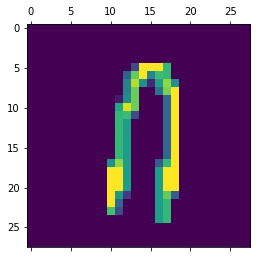

In [14]:
plt.matshow(x_test[1])

In [15]:
np.argmax(y_predicted[1])

1